<a href="https://colab.research.google.com/github/chavesfernanda/lia1_2025_2/blob/main/fruits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#🍏 **Classificação de frutas (boas e apodrecidas)** 🍒

Utilizou-se 10 frutas para cada categoria: **Fresh Apple, Fresh Mango, Fresh Orange, Fresh Potato, Fresh Tomato, Rotten Apple, Rotten Mango, Rotten Orange, Rotten Potato, Rotten Tomato.** Sendo capaz de classificar de acordo com uma determinada imagem.

https://www.kaggle.com/datasets/filipemonteir/fresh-and-rotten-fruits-and-vegetables

In [ ]:
# Versão da Linguagem Python
from platform import python_version
print('Versão do Python neste Notebook:', python_version())

Versão do Python neste Notebook: 3.12.11


In [ ]:
# Instala o TF
#!pip install -q tensorflow==2.12
!pip install -q tensorflow

In [ ]:
# Silencia mensagens do TF
%env TF_CPP_MIN_LOG_LEVEL=3

env: TF_CPP_MIN_LOG_LEVEL=3


In [ ]:
# Preparação do ambiente

!pip install -q kaggle tensorflow matplotlib seaborn pillow scikit-learn

In [ ]:
# Função para exibir as imagens
def visualiza_imagens(images, labels):
    plt.figure(figsize = (10,10))
    for i in range(25):
        plt.subplot(5, 5, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap = plt.cm.binary)
        plt.xlabel(nomes_classes[labels[i]])
    plt.show()

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tensorflow.keras import layers

# **Dataset - Kaggle**

In [ ]:
# Download do dataset (Kaggle)

# Upload do arquivo kaggle.json no Colab (credenciais da API)
from google.colab import files
files.upload()   # selecionar o kaggle.json baixado do Kaggle

!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

https://www.kaggle.com/datasets/filipemonteir/fresh-and-rotten-fruits-and-vegetables

In [ ]:
# Baixar dataset Fresh & Rotten Fruits
!kaggle datasets download -d sriramr/fruits-fresh-and-rotten-for-classification
!unzip -q fruits-fresh-and-rotten-for-classification.zip -d fruits_data

https://www.kaggle.com/datasets/filipemonteir/fresh-and-rotten-fruits-and-vegetables

In [ ]:
import os

# Caminho base após unzip
base_dir = "fruits_data/fruits-fresh-and-rotten-for-classification"

In [ ]:
import os

# Vamos listar as pastas dentro de fruits_data
print("Conteúdo de fruits_data:")
print(os.listdir("fruits_data"))

Conteúdo de fruits_data:
['dataset']


In [ ]:
# Detectar automaticamente o nome da pasta criada
base_dir = os.path.join("fruits_data", os.listdir("fruits_data")[0])
print("Base dir detectado:", base_dir)

Base dir detectado: fruits_data/dataset


In [ ]:
# Agora procurar train/ e test/
def encontra_subpasta(nome):
    for root, dirs, files in os.walk(base_dir):
        if nome in dirs:
            return os.path.join(root, nome)
    return None

train_dir = encontra_subpasta("train")
test_dir = encontra_subpasta("test")

print("Train:", train_dir)
print("Test:", test_dir)

Train: fruits_data/dataset/train
Test: fruits_data/dataset/test


In [ ]:
# IMG_SIZE e BATCH_SIZE antes de usar.
IMG_SIZE = 180
BATCH_SIZE = 32

import tensorflow as tf

train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

Found 10901 files belonging to 6 classes.
Found 2698 files belonging to 6 classes.


In [ ]:
!ls fruits_data

dataset


In [ ]:
!ls fruits_data/dataset

dataset  test  train


In [ ]:
# Lista o conteúdo do diretório para descobrir o caminho exato
!ls -R fruits_data

A saída de streaming foi truncada nas últimas 5000 linhas.
'rotated_by_75_Screen Shot 2018-06-07 at 3.01.21 PM.png'
'rotated_by_75_Screen Shot 2018-06-07 at 3.01.38 PM.png'
'rotated_by_75_Screen Shot 2018-06-07 at 3.01.54 PM.png'
'rotated_by_75_Screen Shot 2018-06-07 at 3.02.02 PM.png'
'rotated_by_75_Screen Shot 2018-06-07 at 3.02.18 PM.png'
'rotated_by_75_Screen Shot 2018-06-07 at 3.02.37 PM.png'
'rotated_by_75_Screen Shot 2018-06-07 at 3.02.51 PM.png'
'rotated_by_75_Screen Shot 2018-06-07 at 3.03.02 PM.png'
'rotated_by_75_Screen Shot 2018-06-07 at 3.03.12 PM.png'
'rotated_by_75_Screen Shot 2018-06-07 at 3.03.21 PM.png'
'rotated_by_75_Screen Shot 2018-06-07 at 3.03.31 PM.png'
'rotated_by_75_Screen Shot 2018-06-07 at 3.03.38 PM.png'
'rotated_by_75_Screen Shot 2018-06-07 at 3.03.46 PM.png'
'rotated_by_75_Screen Shot 2018-06-07 at 3.03.58 PM.png'
'rotated_by_75_Screen Shot 2018-06-07 at 3.04.04 PM.png'
'rotated_by_75_Screen Shot 2018-06-07 at 3.04.10 PM.png'
'rotated_by_75_Screen Shot 20

# **Correção dos caminhos**

In [ ]:
import tensorflow as tf

# Pasta base onde os dados foram descompactados.

base_dir = "fruits_data/dataset"

# Parâmetros de carregamento
img_height = 180
img_width = 180
batch_size = 32

# Carrega o dataset de treino automaticamente
train_ds = tf.keras.utils.image_dataset_from_directory(
    f"{base_dir}/train",
    validation_split=0.2, # Usa 20% dos dados de treino para validação
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

# Carrega o dataset de validação
val_ds = tf.keras.utils.image_dataset_from_directory(
    f"{base_dir}/train", # Nota: A validação é feita a partir da pasta de treino
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

# Carrega o dataset de teste
test_ds = tf.keras.utils.image_dataset_from_directory(
    f"{base_dir}/test",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

# Obtém os nomes das classes automaticamente
class_names = train_ds.class_names
print(f"Nomes das classes: {class_names}")

# Normaliza os dados (pixels de 0-255 para 0-1)
normalization_layer = tf.keras.layers.Rescaling(1./255)

train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))
test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y))

# Otimiza o carregamento de dados para o treino
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

Found 10901 files belonging to 6 classes.
Using 8721 files for training.
Found 10901 files belonging to 6 classes.
Using 2180 files for validation.
Found 2698 files belonging to 6 classes.
Nomes das classes: ['freshapples', 'freshbanana', 'freshoranges', 'rottenapples', 'rottenbanana', 'rottenoranges']


In [ ]:
# Correção dos caminhos
import os

# Caminho base após unzip
base_dir = "fruits_data/dataset"

# Caminhos corretos para as subpastas
train_dir = os.path.join(base_dir, "train")
test_dir = os.path.join(base_dir, "test")

# Exibe os caminhos para confirmar
print(f"Caminho de Treino: {train_dir}")
print(f"Caminho de Teste: {test_dir}")

# Verifique o conteúdo para ter certeza
!ls "$train_dir"
!ls "$test_dir"

Caminho de Treino: fruits_data/dataset/train
Caminho de Teste: fruits_data/dataset/test
freshapples  freshoranges  rottenbanana
freshbanana  rottenapples  rottenoranges
freshapples  freshoranges  rottenbanana
freshbanana  rottenapples  rottenoranges


In [ ]:
!ls $train_dir
!ls $test_dir

freshapples  freshoranges  rottenbanana
freshbanana  rottenapples  rottenoranges
freshapples  freshoranges  rottenbanana
freshbanana  rottenapples  rottenoranges


In [ ]:
import tensorflow as tf

# Define a pasta base onde os dados foram descompactados.
# Verifique o nome exato. Com base no seu erro, o caminho correto é:
base_dir = "fruits_data/dataset"

# Parâmetros de carregamento
img_height = 180
img_width = 180
batch_size = 32

# Carrega o dataset de treino automaticamente
train_ds = tf.keras.utils.image_dataset_from_directory(
    f"{base_dir}/train",
    validation_split=0.2, # Usa 20% dos dados de treino para validação
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

# Carrega o dataset de validação
val_ds = tf.keras.utils.image_dataset_from_directory(
    f"{base_dir}/train", # Nota: A validação é feita a partir da pasta de treino
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

# Carrega o dataset de teste
test_ds = tf.keras.utils.image_dataset_from_directory(
    f"{base_dir}/test",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

# Obtém os nomes das classes automaticamente
class_names = train_ds.class_names
print(f"Nomes das classes: {class_names}")

# Normaliza os dados (pixels de 0-255 para 0-1)
normalization_layer = tf.keras.layers.Rescaling(1./255)

train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))
test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y))

# Otimiza o carregamento de dados para o treino
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

Found 10901 files belonging to 6 classes.
Using 8721 files for training.
Found 10901 files belonging to 6 classes.
Using 2180 files for validation.
Found 2698 files belonging to 6 classes.
Nomes das classes: ['freshapples', 'freshbanana', 'freshoranges', 'rottenapples', 'rottenbanana', 'rottenoranges']


In [ ]:
import tensorflow as tf

# Define a pasta base onde os dados foram descompactados.
base_dir = "fruits_data/dataset"

# Parâmetros de carregamento
img_height = 180
img_width = 180
batch_size = 32

# Carrega o dataset de treino
train_ds = tf.keras.utils.image_dataset_from_directory(
    f"{base_dir}/train",
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

# Carrega o dataset de validação
val_ds = tf.keras.utils.image_dataset_from_directory(
    f"{base_dir}/train",
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

# Carrega o dataset de teste
test_ds = tf.keras.utils.image_dataset_from_directory(
    f"{base_dir}/test",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

# --- Pegue os nomes das classes ANTES de normalizar ---
class_names = train_ds.class_names
print(f"Nomes das classes: {class_names}")

# Normaliza os dados (pixels de 0-255 para 0-1)
normalization_layer = tf.keras.layers.Rescaling(1./255)

train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))
test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y))

# Otimiza o carregamento de dados para o treino
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

Found 10901 files belonging to 6 classes.
Using 8721 files for training.
Found 10901 files belonging to 6 classes.
Using 2180 files for validation.
Found 2698 files belonging to 6 classes.
Nomes das classes: ['freshapples', 'freshbanana', 'freshoranges', 'rottenapples', 'rottenbanana', 'rottenoranges']


# **Nomalizar**

In [ ]:
# Normalização (0–1)

import tensorflow as tf
from tensorflow.keras import layers

normalization_layer = layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y))

# **Nome das classes**

In [ ]:
# Carregar dataset original
train_ds_original = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

# Guardar nomes das classes
nomes_classes = train_ds_original.class_names
print("Classes:", nomes_classes)

Found 10901 files belonging to 6 classes.
Classes: ['freshapples', 'freshbanana', 'freshoranges', 'rottenapples', 'rottenbanana', 'rottenoranges']


# **Classes**

In [ ]:
import os

nomes_classes = sorted(os.listdir(train_dir))
print("Classes:", nomes_classes)

Classes: ['freshapples', 'freshbanana', 'freshoranges', 'rottenapples', 'rottenbanana', 'rottenoranges']


# **Construção do Modelo**

In [ ]:
# Construção do Modelo (CNN)

modelo_food = models.Sequential([
    layers.Conv2D(32, (3,3), activation="relu", input_shape=(64,64,3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation="relu"),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(len(nomes_classes), activation="softmax")
])

modelo_food.summary()

Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_38 (Conv2D)              │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_34 (MaxPooling2D) │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_39 (Conv2D)              │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_35 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_40 (Conv2D)              │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_36 (MaxPooling2D) │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_12 (Flatten)            │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 683,974 (2.61 MB)

 Trainable params: 683,974 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

# **Arquitetura do Modelo**

In [ ]:
# Arquitetura do Modelo
modelo_lia = models.Sequential()

In [ ]:
# Adicionr Data Augmentation à sua arquitetura
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
])

modelo_lia.add(data_augmentation)
modelo_lia.add(layers.Rescaling(1./255))
modelo_lia.add(layers.Conv2D(32, (3, 3), activation='relu'))

# **Camadas Covulacionais**

In [ ]:
# Camadas Convolucionais

modelo_lia.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)))
modelo_lia.add(layers.MaxPooling2D((2, 2)))
modelo_lia.add(layers.Conv2D(64, (3, 3), activation='relu'))
modelo_lia.add(layers.MaxPooling2D((2, 2)))

In [ ]:
# Camadas de Classificação
modelo_lia.add(layers.Flatten())
modelo_lia.add(layers.Dense(64, activation = 'relu'))
modelo_lia.add(layers.Dense(len(nomes_classes), activation = 'softmax'))

In [ ]:
# Sumário do modelo
modelo_lia.summary()

Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_22 (Sequential)      │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_27 (Rescaling)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_41 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_42 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_37 (MaxPooling2D) │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_43 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_38 (MaxPooling2D) │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_13 (Flatten)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compilação do modelo
modelo_lia.compile(optimizer = 'adam',
                   loss = 'sparse_categorical_crossentropy',
                   metrics = ['accuracy'])

# **Treinamento**

In [ ]:
# Importe as camadas de Data Augmentation
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom

# Arquitetura do Modelo com Data Augmentation
data_augmentation = tf.keras.Sequential([
    RandomFlip("horizontal_and_vertical"),
    RandomRotation(0.2),
    RandomZoom(0.2),
])

modelo_food_otimizado = models.Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(nomes_classes), activation='softmax')
])

# Compilação e treinamento do novo modelo
modelo_food_otimizado.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Treinamento
history_otimizado = modelo_food_otimizado.fit(
    train_ds,
    validation_data=val_ds,
    epochs=2
)

Epoch 1/2
273/273 ━━━━━━━━━━━━━━━━━━━━ 650s 2s/step - accuracy: 0.2128 - loss: 1.7842 - val_accuracy: 0.2041 - val_loss: 1.7793
Epoch 2/2
273/273 ━━━━━━━━━━━━━━━━━━━━ 664s 2s/step - accuracy: 0.2128 - loss: 1.7763 - val_accuracy: 0.2041 - val_loss: 1.7796


In [ ]:
def visualiza_imagens(images, labels, nomes_classes):
    plt.figure(figsize=(10,10))
    for i in range(25):  # mostra 25 imagens
        plt.subplot(5,5,i+1)
        plt.grid(False)

        img = images[i]

        # Caso a imagem seja normalizada (0-1), converte para 0-255
        if img.max() <= 1.0:
            img = (img * 255).astype("uint8")

        # Se tiver só 1 canal (grayscale), ajusta
        if len(img.shape) == 2:  # (H, W)
            plt.imshow(img, cmap="gray")
        elif len(img.shape) == 3 and img.shape[-1] == 1:  # (H, W, 1)
            plt.imshow(img.squeeze(), cmap="gray")
        else:  # RGB normal (H, W, 3)
            plt.imshow(img)

        plt.xlabel(nomes_classes[labels[i]])
        plt.xticks([])
        plt.yticks([])

    plt.show()


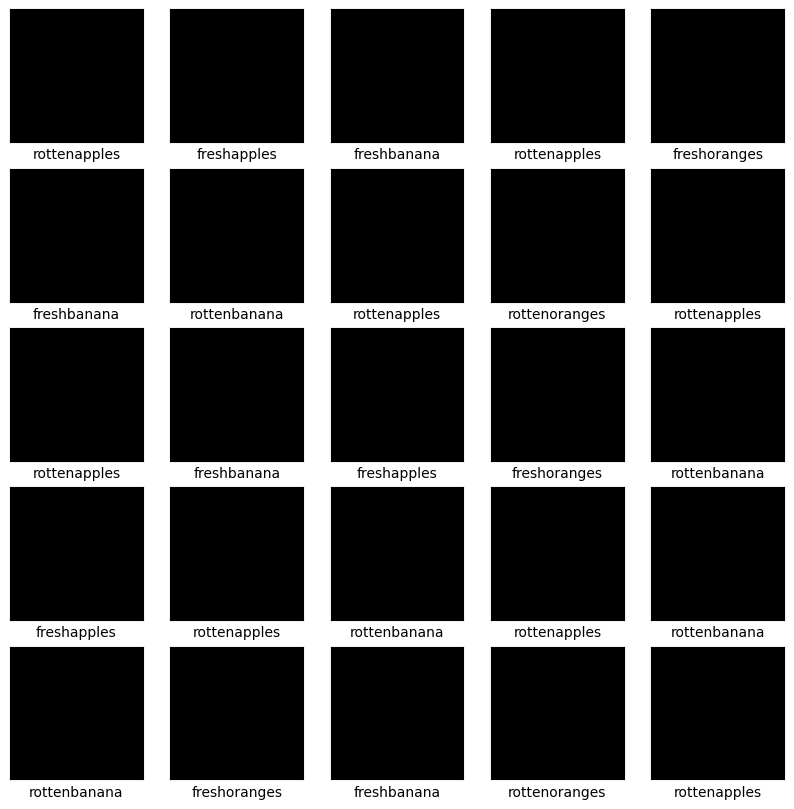

In [ ]:
# Agora execute a função visualiza_imagens com os dados extraídos
visualiza_imagens(imagens_treino, labels_treino, nomes_classes)

# **Imagem**

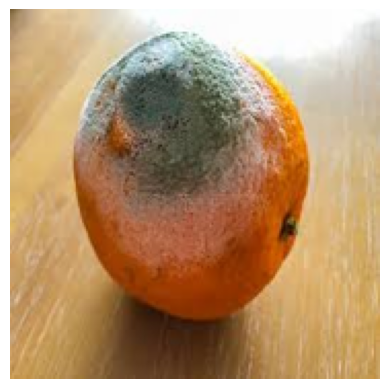

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
A nova imagem foi classificada como: rottenoranges


In [ ]:
# Troque o caminho pela sua imagem
nova_imagem = Image.open("/content/image6.jpg").resize((img_width, img_height))
plt.imshow(nova_imagem)
plt.axis("off")
plt.show()

nova_array = np.expand_dims(np.array(nova_imagem)/255.0, axis=0)
previsao = modelo_lia.predict(nova_array)
classe_prevista = np.argmax(previsao)
print("A nova imagem foi classificada como:", nomes_classes[classe_prevista])

## **Acurácia e Perda**

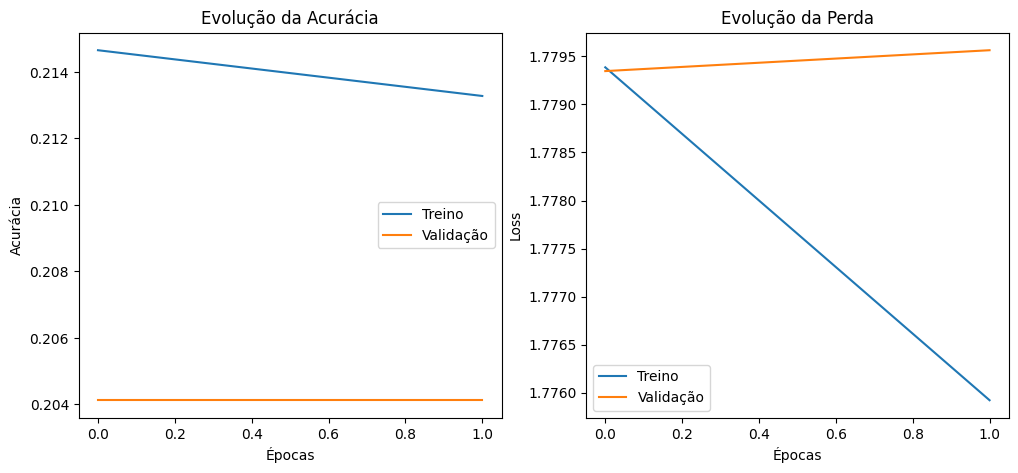

In [ ]:
# Gráficos de Acurácia e Perda

plt.figure(figsize=(12,5))

# Acurácia
plt.subplot(1,2,1)
plt.plot(history_otimizado.history['accuracy'], label="Treino")
plt.plot(history_otimizado.history['val_accuracy'], label="Validação")
plt.title("Evolução da Acurácia")
plt.xlabel("Épocas")
plt.ylabel("Acurácia")
plt.legend()

# Perda
plt.subplot(1,2,2)
plt.plot(history_otimizado.history['loss'], label="Treino")
plt.plot(history_otimizado.history['val_loss'], label="Validação")
plt.title("Evolução da Perda")
plt.xlabel("Épocas")
plt.ylabel("Loss")
plt.legend()

plt.show()

# **Matriz Confusão**

85/85 - 74s - 876ms/step - accuracy: 0.1527 - loss: 1.7918

Acurácia com dados de Teste: 0.15270571410655975
85/85 ━━━━━━━━━━━━━━━━━━━━ 74s 870ms/step


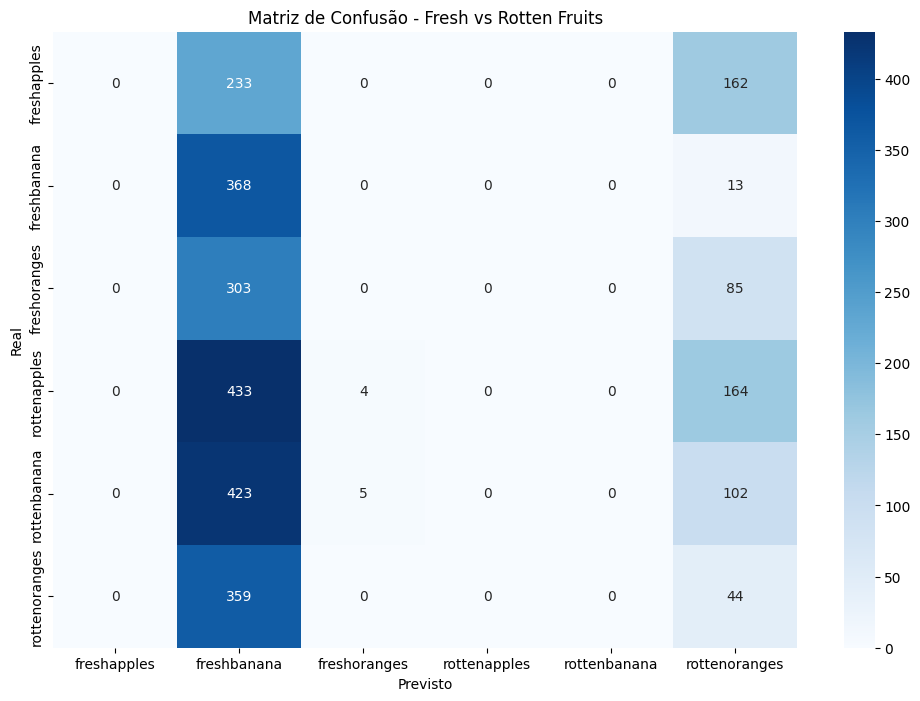

In [ ]:
erro_teste, acc_teste = modelo_lia.evaluate(test_ds, verbose=2)
print("\nAcurácia com dados de Teste:", acc_teste)

# Matriz de confusão
y_true = np.concatenate([y for x, y in test_ds], axis=0)
y_pred = np.argmax(modelo_lia.predict(test_ds), axis=1)

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(12,8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=nomes_classes,
            yticklabels=nomes_classes)
plt.title("Matriz de Confusão - Fresh vs Rotten Fruits")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.show()

**Finalizado!** ✅

Att, Fernanda Chaves.